In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/cifar-10-batches-py.zip

Archive:  /content/drive/MyDrive/cifar-10-batches-py.zip
  inflating: cifar-10-batches-py/batches.meta  
  inflating: cifar-10-batches-py/data_batch_1  
  inflating: cifar-10-batches-py/data_batch_2  
  inflating: cifar-10-batches-py/data_batch_3  
  inflating: cifar-10-batches-py/data_batch_4  
  inflating: cifar-10-batches-py/data_batch_5  
 extracting: cifar-10-batches-py/readme.html  
  inflating: cifar-10-batches-py/test_batch  


In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
cifar10_dataset_folder_path = '/content/cifar-10-batches-py'
cifar_org_train_df = pd.DataFrame()
cifar_org_test_df = pd.DataFrame()

In [ ]:
for i in range(1,6):
  with open(cifar10_dataset_folder_path + '/data_batch_' + str(i), mode='rb') as file:
          batch = pickle.load(file, encoding='latin1')
          
  #train_features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
  train_features = batch['data']
  train_labels = batch['labels']
  cifar_org_train_df = cifar_org_train_df.append(pd.DataFrame({"labels":train_labels,"images":list(train_features)}))

In [ ]:
# load the test dataset
with open(cifar10_dataset_folder_path + '/test_batch', mode='rb') as file:
    batch = pickle.load(file, encoding='latin1')

# preprocess the testing data
#test_features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
test_features = batch['data']
test_labels = batch['labels']
cifar_org_test_df = cifar_org_test_df.append(pd.DataFrame({"labels":test_labels,"images":list(test_features)}))

In [ ]:
cifar_org_train_df = cifar_org_train_df[(cifar_org_train_df["labels"] == 0) | (cifar_org_train_df["labels"] == 1) | 
                                        (cifar_org_train_df["labels"] == 2) | (cifar_org_train_df["labels"] == 3) |
                                        (cifar_org_train_df["labels"] == 4)]
cifar_org_test_df = cifar_org_test_df[(cifar_org_test_df["labels"] == 0) | (cifar_org_test_df["labels"] == 1) | 
                                      (cifar_org_test_df["labels"] == 2) | (cifar_org_test_df["labels"] == 3) | 
                                      (cifar_org_test_df["labels"] == 4)]

In [ ]:
train_img = list(cifar_org_train_df["images"].values)
train_labels = list(cifar_org_train_df["labels"].values)

test_img = list(cifar_org_test_df["images"].values)
test_labels = list(cifar_org_test_df["labels"].values)

In [ ]:
train_images = np.array(train_img) / 255.0
train_labels = np.array(train_labels)

test_images = np.array(test_img) / 255.0
test_labels = np.array(test_labels)

In [ ]:
# clf = svm.SVC(gamma=0.1, kernel='poly', probability=True)
# clf.fit(train_images,train_labels)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape = (784,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 325       
Total params: 142,085
Trainable params: 142,085
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, epochs=500,callbacks=[callback])

Epoch 1/500
782/782 [==============================] - 4s 4ms/step - loss: 1.3763 - accuracy: 0.4147
Epoch 2/500
782/782 [==============================] - 3s 4ms/step - loss: 1.1754 - accuracy: 0.5184
Epoch 3/500
782/782 [==============================] - 3s 4ms/step - loss: 1.0974 - accuracy: 0.5574
Epoch 4/500
782/782 [==============================] - 3s 4ms/step - loss: 1.0616 - accuracy: 0.5738
Epoch 5/500
782/782 [==============================] - 3s 4ms/step - loss: 1.0335 - accuracy: 0.5840
Epoch 6/500
782/782 [==============================] - 3s 4ms/step - loss: 0.9852 - accuracy: 0.6108
Epoch 7/500
782/782 [==============================] - 3s 4ms/step - loss: 0.9807 - accuracy: 0.6070
Epoch 8/500
782/782 [==============================] - 3s 4ms/step - loss: 0.9460 - accuracy: 0.6227
Epoch 9/500
782/782 [==============================] - 3s 4ms/step - loss: 0.9306 - accuracy: 0.6282
Epoch 10/500
782/782 [==============================] - 3s 4ms/step - loss: 0.9210 - accura

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

157/157 [==============================] - 0s 2ms/step - loss: 1.6791 - accuracy: 0.6134
Test accuracy: 0.6133999824523926


In [ ]:
pred_test_labels = np.argmax(model.predict(test_images),axis =1)

In [ ]:
con_mat = np.zeros((5,5))
for i in range(len(test_labels)):
  con_mat[test_labels[i]][pred_test_labels[i]] += 1

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer']
con_mat_df = pd.DataFrame(con_mat, index = [i for i in class_names],
                  columns = [i for i in class_names])

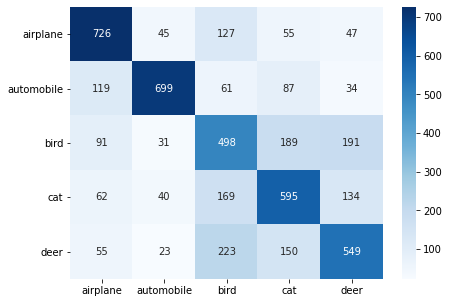

In [ ]:
plt.figure(figsize = (7,5))
sns.heatmap(con_mat_df, annot=True, fmt='g',cmap='Blues')

In [ ]:
FP = con_mat.sum(axis=0) - np.diag(con_mat) 
FN = con_mat.sum(axis=1) - np.diag(con_mat)
TP = np.diag(con_mat)
TN = con_mat.sum() - (FP + FN + TP)

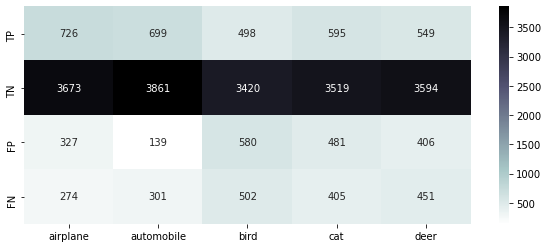

In [ ]:
tfr_mat_df = pd.DataFrame((TP,TN,FP,FN),  columns = [i for i in class_names],
                  index = [i for i in ['TP','TN','FP','FN']])
plt.figure(figsize = (10,4))
sns.heatmap(tfr_mat_df, annot=True, fmt='g',cmap='bone_r')